In [63]:
# Setup 
qtd_iteracoes = 10
R0 = 5
Rl = 15
Rg = 2
E = 100

# Calculo dos coeficientes de tensao e de Vl+
Tg = (Rg - R0)/(Rg + R0)  
Tl = (Rl - R0)/(Rl + R0)
Vl = R0 * E / (R0 + Rg)

coeficientes = [0] * qtd_iteracoes
coeficientes[0] = 1
for i in range(1, qtd_iteracoes):
    if i % 2 == 1:
        coeficientes[i] = coeficientes[i-1] * Tl 
    else: 
        coeficientes[i] = coeficientes[i-1] * Tg


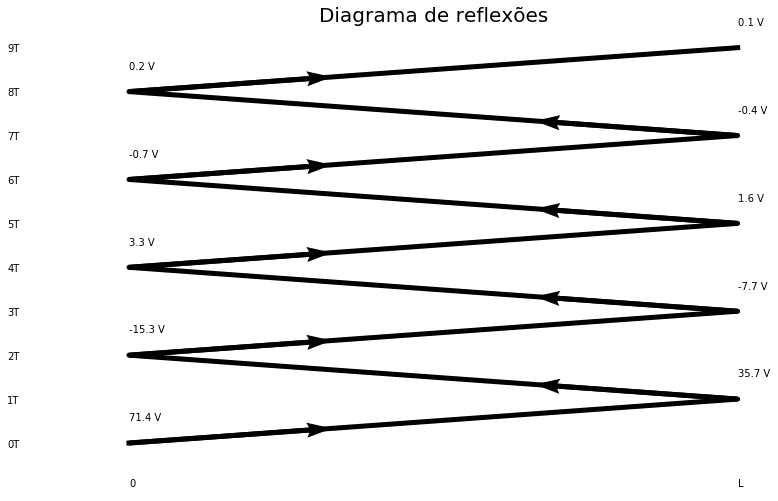

In [64]:
from matplotlib import pyplot as plt
import numpy as np

x_escala = 1 
y_escala = 2

x = np.zeros(qtd_iteracoes)
y = np.arange(0, qtd_iteracoes*2, y_escala) 

for i in range(qtd_iteracoes): 
    if i % 2 == 1: 
        x[i] = x_escala 
        
plt.figure(figsize=(12,8))
plt.title("Diagrama de reflexões", fontsize=20)
plt.xlabel('x')
plt.ylabel('T')
plt.axis('off')
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=3)
plt.plot(x, y, 'black', linewidth=5)

plt.text(0, -2, 0)
plt.text(x_escala, -2, "L")

for i, coeficiente in enumerate(coeficientes):
    plt.text(-0.2, y_escala*i - 0.1*y_escala, str(i) + "T")
    plt.text((x_escala * i%2), (y_escala * i) + y_escala/2,
                "{0:.1f}".format(coeficiente * Vl) + " V")

plt.show()

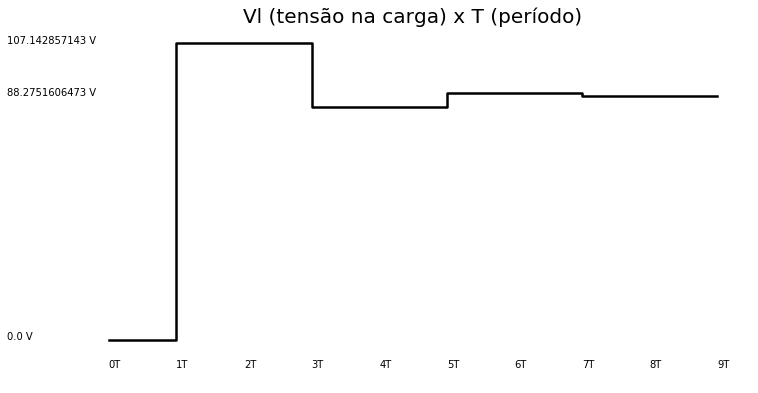

In [65]:
x_escala = 1 
y_escala = 2

x = np.arange(0, qtd_iteracoes)
y = np.zeros(qtd_iteracoes) 


for i in range(1, qtd_iteracoes, 2): 
    c_atual = 0
    for j in range(i+1):
        c_atual += coeficientes[j]
        
    y[i] = Vl * c_atual
    if (i+1) < qtd_iteracoes:
        y[i + 1] = Vl * c_atual 

x_, y_ = [x[0]], [y[0]]
for i, v in enumerate(y[:-1]):
    if y[i] != y[i+1]:
        y_ += [y[i], y[i+1]]
        x_ += [x[i+1], x[i+1]]
    else: 
        y_ += [y[i]]
        x_ += [x[i]]
        
plt.figure(figsize=(12,6))
plt.title("Vl (tensão na carga) x T (período)", fontsize=20)
plt.xlabel('T')
plt.ylabel('EV')
plt.axis('off')
plt.plot(x_, y_, 'black', linewidth=2.5)

for i in x: 
    plt.text(i, -5*y_escala, str(i) + "T")

y_max = np.amax(y)
y_ = [y[0], y[-1], y_max]
for j in np.sort(np.unique(y_)): 
    plt.text(-1.5*x_escala, j, str(j) + " V")
    
plt.show()